<h1> Traveaux pratiques 1 - IMA201 - Acquisition, radiométrie</h1>
<br>BELKACEM Mohamed Amir

<h2>1. Préliminaires</h2>
<h3> &nbsp 1.1 Inclusion de packages externes</h3>

In [2]:
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image 
from skimage import io as skio

<h3> &nbsp 1.2 fonctions utiles pour le TP</h3>

In [3]:
def viewimage(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS 
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee 
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI et MAXI seront mis a 0 et 255 dans l'image resultat
        
    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase=' ' 
    elif platform.system()=='Windows': 
        #ou windows ; probleme : il faut fermer gimp pour reprendre la main; 
        #si vous savez comment faire (commande start ?) je suis preneur 
        prephrase='"C:/Users/DELL/AppData/Local/Programs/GIMP 2/bin/gimp-2.10.exe" '
        endphrase=' '
    else: #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais pas comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase= ' &'
    
    if normalise:
        m=im.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=255*imt/M

    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
        imt *= 255
    
    nomfichier=tempfile.mktemp('TPIMA.png')
    commande=prephrase +nomfichier+endphrase
    imt = imt.astype(np.uint8)
    skio.imsave(nomfichier,imt)
    os.system(commande)

def viewimage_color(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS 
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee 
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI(defaut 0) et MAXI (defaut 255) seront mis a 0 et 255 dans l'image resultat
        
    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase= ' '
    elif platform.system()=='Windows': 
        #ou windows ; probleme : il faut fermer gimp pour reprendre la main; 
        #si vous savez comment faire (commande start ?) je suis preneur 
        prephrase='"C:/Users/DELL/AppData/Local/Programs/GIMP 2/bin/gimp-2.10.exe" '
        endphrase=' '
    else: #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase=' &'
    
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=255*imt/M
    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
        imt *= 255
    
    nomfichier=tempfile.mktemp('TPIMA.pgm')
    commande=prephrase +nomfichier+endphrase
    imt = imt.astype(np.uint8)
    skio.imsave(nomfichier,imt)
    os.system(commande)

def noise(im,br):
    """ Cette fonction ajoute un bruit blanc gaussier d'ecart type br
       a l'image im et renvoie le resultat"""
    imt=np.float32(im.copy())
    sh=imt.shape
    bruit=br*np.random.randn(*sh)
    imt=imt+bruit
    return imt

def quantize(im,n=2):
    """
    Renvoie une version quantifiee de l'image sur n (=2 par defaut) niveaux  
    """
    imt=np.float32(im.copy())
    if np.floor(n)!= n or n<2:
        raise Exception("La valeur de n n'est pas bonne dans quantize")
    else:
        m=imt.min()
        M=imt.max()
        imt=np.floor(n*((imt-m)/(M-m)))*(M-m)/n+m
        imt[imt==M]=M-(M-m)/n #cas des valeurs maximales
        return imt
    

def seuil(im,s):
    """ renvoie une image blanche(255) la ou im>=s et noire (0) ailleurs.
    """
    imt=np.float32(im.copy())
    mask=imt<s
    imt[mask]=0
    imt[~mask]=255
    return imt

def gradx(im):
    "renvoie le gradient dans la direction x"
    imt=np.float32(im)
    gx=0*imt
    gx[:,:-1]=imt[:,1:]-imt[:,:-1]
    return gx

def grady(im):
    "renvoie le gradient dans la direction y"
    imt=np.float32(im)
    gy=0*imt
    gy[:-1,:]=imt[1:,:]-imt[:-1,:]
    return gy

def view_spectre(im,option=1,hamming=False):
    """ affiche le spectre d'une image
     si option =1 on affiche l'intensite de maniere lineaire
     si option =2 on affiche le log
     si hamming=True (defaut False) alors une fenetre de hamming est appliquee avant de prendre la transformee de Fourier
     """
    imt=np.float32(im.copy())
    (ty,tx)=im.shape
    pi=np.pi
    if hamming:
        XX=np.ones((ty,1))@(np.arange(0,tx).reshape((1,tx)))
        YY=(np.arange(0,ty).reshape((ty,1)))@np.ones((1,tx))
        imt=(1-np.cos(2*pi*XX/(tx-1)))*(1-np.cos(2*pi*YY/(ty-1)))*imt
    aft=np.fft.fftshift(abs(np.fft.fft2(imt)))
    
    if option==1:
        viewimage(aft)
    else:
        viewimage(np.log(0.1+aft))


def filterlow(im): 
    """applique un filtre passe-bas parfait a une image (taille paire)"""
    (ty,tx)=im.shape
    imt=np.float32(im.copy())
    pi=np.pi
    XX=np.concatenate((np.arange(0,tx/2+1),np.arange(-tx/2+1,0)))
    XX=np.ones((ty,1))@(XX.reshape((1,tx)))
    
    YY=np.concatenate((np.arange(0,ty/2+1),np.arange(-ty/2+1,0)))
    YY=(YY.reshape((ty,1)))@np.ones((1,tx))
    mask=(abs(XX)<tx/4) & (abs(YY)<ty/4)
    imtf=np.fft.fft2(imt)
    imtf[~mask]=0
    return np.real(np.fft.ifft2(imtf))

def filtergauss(im):
    """applique un filtre passe-bas gaussien. coupe approximativement a f0/4"""
    (ty,tx)=im.shape
    imt=np.float32(im.copy())
    pi=np.pi
    XX=np.concatenate((np.arange(0,tx/2+1),np.arange(-tx/2+1,0)))
    XX=np.ones((ty,1))@(XX.reshape((1,tx)))
    
    YY=np.concatenate((np.arange(0,ty/2+1),np.arange(-ty/2+1,0)))
    YY=(YY.reshape((ty,1)))@np.ones((1,tx))
    # C'est une gaussienne, dont la moyenne est choisie de sorte que
    # l'integrale soit la meme que celle du filtre passe bas
    # (2*pi*sig^2=1/4*x*y (on a suppose que tx=ty))
    sig=(tx*ty)**0.5/2/(pi**0.5)
    mask=np.exp(-(XX**2+YY**2)/2/sig**2)
    imtf=np.fft.fft2(imt)*mask
    return np.real(np.fft.ifft2(imtf))

<h2> 2. Visualisation et utilisation de gimps</h2>
<h3> &nbsp 2.1 Zooms</h3>
<br>
Ouvrez une image de votre choix dans gimp.

In [4]:
im = skio.imread('images/spirale.jpg')
viewimage(im)

<div>
    <img src = "images/spirale.jpg" width="500"> <h3 style="text-align:center">image originle </h3>
</div>
<br>
Zoomez-la d'un facteur 2 ou plus pour la visualiser en plus grand.
<div>
    <img src = "captures/zoom800.png" width="500"> <h3 style="text-align:center">image zoomée 800% </h3>
</div>
<br>
Que fait gimp pour afficher l'image en plus grand? 
<b><i>Lorsqu'on zoome l'image on voit clairement des pixels agrandis. Donc pour afficher l'image en plus grand, Gimp utilise l'interpolation du plus proche voisin.</i></b>
<br>
Ouvrir l'image maison.tif

In [5]:
im = skio.imread('images/maison.tif')
viewimage(im)

<div>
    <img src = "captures/maison org.png">
    <h3 style="text-align:center">image maison.tif originle </h3>
</div>
<br>
Réduisez sa taille par d'un facteur deux. <b>Attention:</b> sélectionner "Aucune" comme méthode d'interpolation. Zoomez-là pour l'afficher en deux fois plus grand.
<img src= "./captures/maison.png" ><h3 style="text-align:center">image maison.tif reduite d'un facteur de deux puis zoomée</h3>
<br>
Ouvrez l'image maison_petit.tif et zoomez-la d'un facteur 2 également.</div>
<img src = "./captures/maison petit.png">
<h3 style="text-align:center">image maison_petit.tif zoomée</h3>
<br>
Comparez le résultat par rapport au zoom de la petite image que vous avez produite. Quelle
hypothèse pouvez-vous faire sur la génération de maison_petit.tif?
<br>
<i><b>L'image "maison_petit.tif" présente une netteté supérieure à celle de l'image réduite issue de "maison.tif" après avoir effectué un zoom, mais on observe toujours des contours anguleux et une apparence "pixelisée" lorsqu'on effectue un agrandissement deux fois plus important. Il est donc probable que l'image "maison_petit.tif" ait été créée en utilisant une interpolation bilinéaire.</b></i>

<h3> &nbsp 2.2 Espace couleurs</h3>
<br>Ouvrir l'image fleur.tif

In [6]:
im = skio.imread('images/fleur.tif')
viewimage_color(im)

<div>
    <img src = "captures/fleur.png" width="500">
    <h3 style="text-align:center">image fleur.tif originle </h3>
</div>
<br>
Essayez de transformer les feurs jaunes en feurs bleues avec le bouton Hue. 
<div>
    <img src = "captures/2.2 fleur.png" width="700">
    <h3 style="text-align:center">image fleur.tif originle </h3>
</div>
<br>
Comprenez-vous pourquoi les deux positions extrêmes de ce boutons font, en fait, la même transformation?
<br>
<div>
    <img src = "./HSV-color-space-Hue-saturation-value.png" width="300">
    <h3 style="text-align:center">Espace de Couleur HSV </h3>
</div>
<br>
<i><b> Comme on voit dans le cone de couleur HSV la teinte (Hue) forme est un cercle et pour choisir une teinte specifique on fait un angle de rotation et donc dans les deux positions extrèmes on fait soit une rotation de 180° soit une rotation de -180° ce qui revient a choisir la même teinte opposée.</b></i>
<br><br>
A quoi correspond la saturation (essayez-100% et +100%)?
<div>
    <img src = "captures/saturation 100.png" width="700">
    <h3 style="text-align:center">image fleur.tif saturée a 100%</h3>
</div>
<br>
<div>
    <img src = "captures/saturation -100.png" width="700">
    <h3 style="text-align:center">image fleur.tif saturée a -100%</h3>
</div>
<br>
<i><b>La saturation mesure l'intensité de la couleur d'un pixel. Ainsi, plus la saturation d'une couleur est faible, plus l'image apparaîtra terne, et dans le cas extrême où elle atteint -100%, l'image deviendra en niveaux de gris. En revanche, lorsque la saturation augmente, les couleurs de l'image deviendront plus vives jusqu'à atteindre 100%.</b></i>

<h2>3. Niveaux de gris, histogrammes et statistiques</h2>
<h3> &nbsp 3.1 Histogramme</h3>
<br>
Commencez par visualiser quelques histogrammes d'images de votre choix. Pour une image couleur, vous pouvez visualiser les histogrammes de l'un des canaux couleur. Vous pouvez aussi visualiser l'histogramme de l'image obtenue en moyennant les
canaux couleur.
<br>
<h3>&nbsp &nbsp 3.1.1 Image en niveaux de gris</h3>

Text(0.5, 1.0, 'image bat.tif')

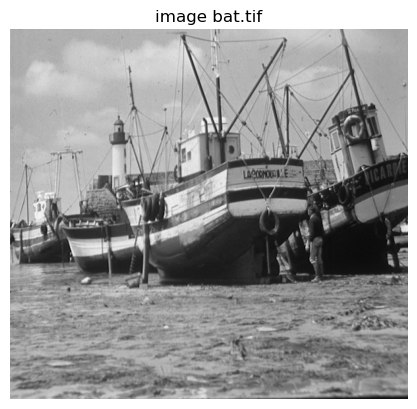

In [7]:
im_gray =  skio.imread('images/bat.tif')
plt.imshow(im_gray, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('image bat.tif')

<function matplotlib.pyplot.show(close=None, block=None)>

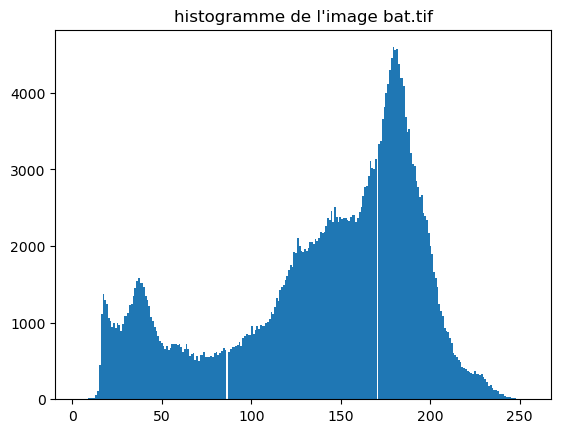

In [8]:
im_gray = np.float32(im_gray)
plt.hist(im_gray.reshape((-1,)),bins=255)
plt.title("histogramme de l'image bat.tif")
plt.show

Text(0.5, 1.0, "histogramme cumulé de l'image bat.tif")

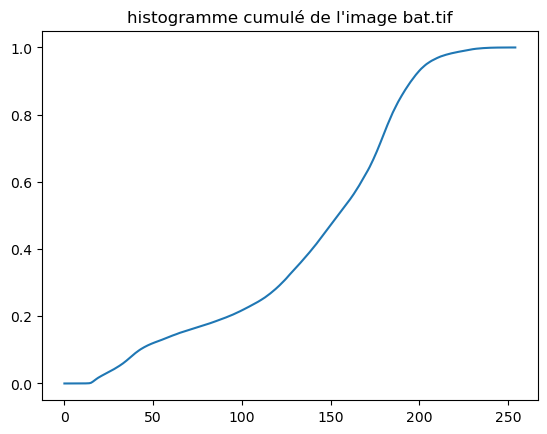

In [9]:
(histo,bins)=np.histogram(im_gray.reshape((-1,)),np.arange(0,256))
histo=histo/histo.sum()
histocum=histo.cumsum()
plt.plot(histocum)
plt.title("histogramme cumulé de l'image bat.tif")

<h3>&nbsp &nbsp 3.1.2 Image colorée</h3>

Text(0.5, 1.0, 'image chile.tif')

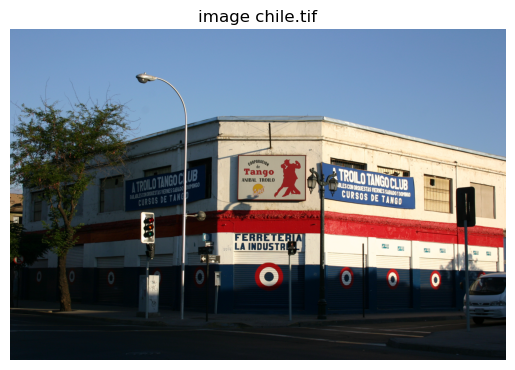

In [10]:
im_col =  skio.imread('images/chile.jpg')
plt.imshow(im_col)
plt.axis('off')
plt.title('image chile.tif')

Comparaison entre l'histogramme du canal rouge et l'histogramme de l'image obtenue en moyennant les
canaux couleur

<function matplotlib.pyplot.show(close=None, block=None)>

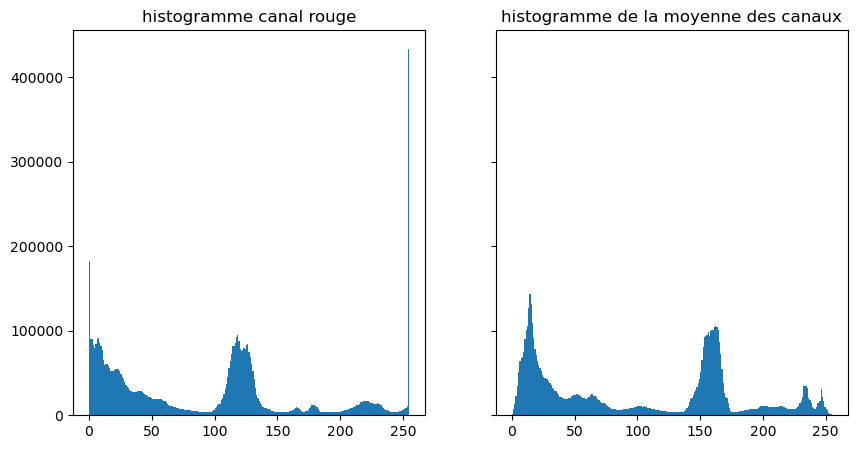

In [11]:
im_col_red = np.float32(im_col[:,:,0])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex = True, sharey = True)
ax1.hist(im_col_red.reshape((-1,)),bins=255)
ax1.set_title("histogramme canal rouge")

im_col_moy = np.float32(im_col.mean(axis=2))
ax2.hist(im_col_moy.reshape((-1,)),bins=255)
ax2.set_title("histogramme de la moyenne des canaux")
#plt.subplots_adjust(wspace=1, hspace=0.5)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

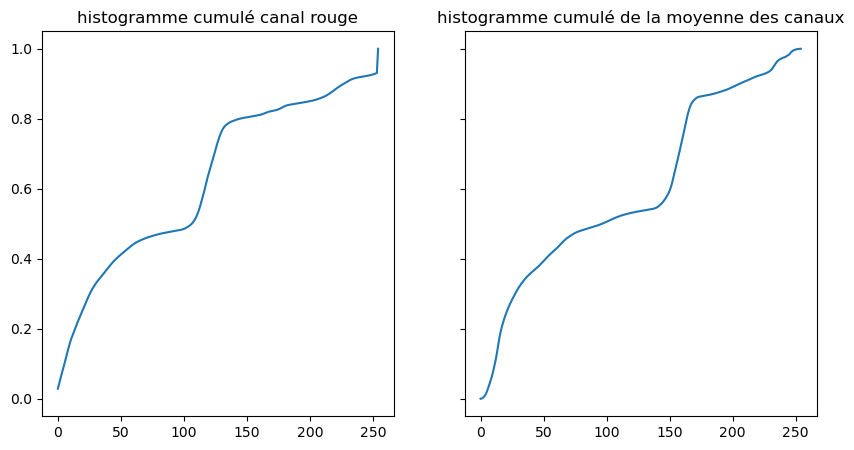

In [12]:
im_col_red = np.float32(im_col[:,:,0])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex = True, sharey = True)

(histo_red,bins)=np.histogram(im_col_red.reshape((-1,)),np.arange(0,256))
histo_red=histo_red/histo_red.sum()
histocum_red=histo_red.cumsum()
ax1.plot(histocum_red)
ax1.set_title("histogramme cumulé canal rouge")

(histo_moy,bins)=np.histogram(im_col_moy.reshape((-1,)),np.arange(0,256))
histo_moy=histo_moy/histo_moy.sum()
histocum_moy=histo_moy.cumsum()
ax2.plot(histocum_moy)
ax2.set_title("histogramme cumulé de la moyenne des canaux")
plt.show

<h3>&nbsp &nbsp 3.1.3 Effet du bruit</h3>
<br>
Nous étudions maintenant l'effet de dégradations simples des images sur leur histogramme. Ajoutez un bruit gaussien à une image et étudiez l'effet produit sur son histogramme

<function matplotlib.pyplot.show(close=None, block=None)>

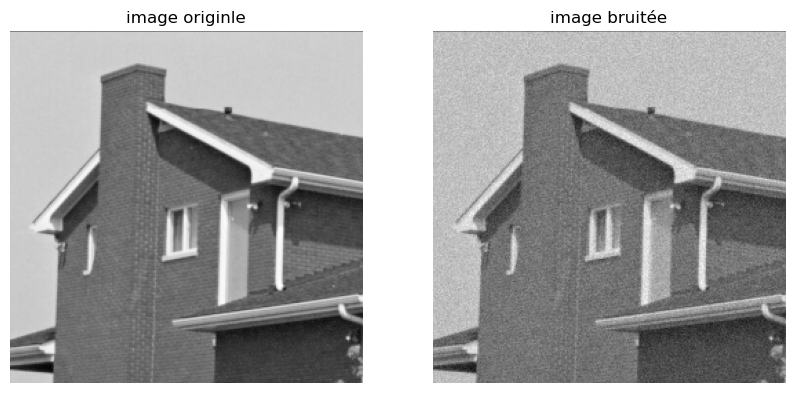

In [13]:
im =  skio.imread('images/maison.tif')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex = True, sharey = True)
ax1.imshow(im, cmap=plt.get_cmap('gray'))
ax1.axis('off')
ax1.set_title('image originle')

im = np.float32(im)
imbr=noise(im,10)
ax2.imshow(imbr, cmap=plt.get_cmap('gray'))
ax2.axis('off')
ax2.set_title('image bruitée')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

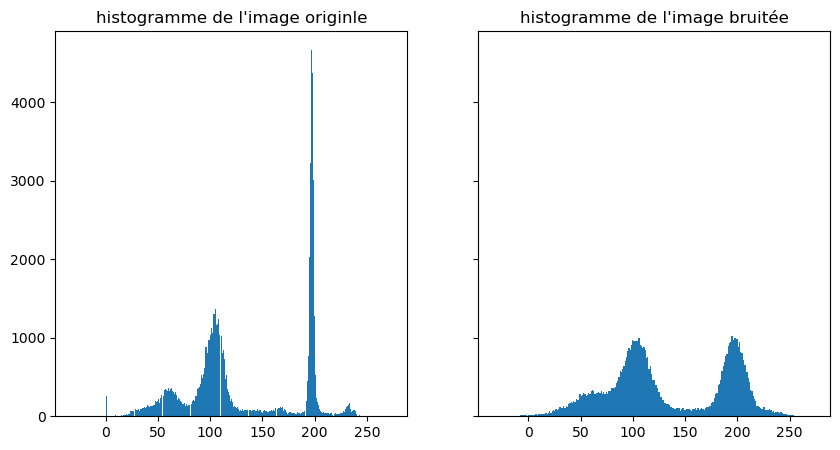

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex = True, sharey = True)
ax1.hist(im.reshape((-1,)),bins=255)
ax1.set_title("histogramme de l'image originle")

ax2.hist(imbr.reshape((-1,)),bins=255)
ax2.set_title("histogramme de l'image bruitée")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

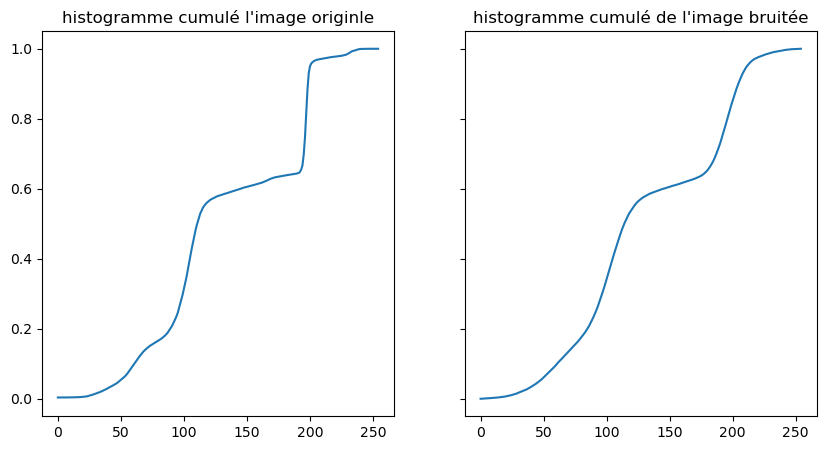

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex = True, sharey = True)
(histo,bins)=np.histogram(im.reshape((-1,)),np.arange(0,256))
histo=histo/histo.sum()
histocum=histo.cumsum()
ax1.plot(histocum)
ax1.set_title("histogramme cumulé l'image originle")

(histo_br,bins)=np.histogram(imbr.reshape((-1,)),np.arange(0,256))
histo_br=histo_br/histo_br.sum()
histocum_br=histo_br.cumsum()
ax2.plot(histocum_br)
ax2.set_title("histogramme cumulé de l'image bruitée")
plt.show

En considérant les niveaux de gris d'une image comme la réalisation d'une variable aléatoire dont
la loi est l'histogramme de l'image, interprétez le résultat.
<br>
<i><b> soit $X$ la valeur d'un pixel de l'image tiré uniformement. $X$ est variable aléatoire  à loi discrête. Et soit $Z$ une variable aléatoire modélisant le bruit telle que $Z \sim \mathcal{N}(0,\,\sigma^{2})$ et $X$ et $Z$ sont indépendantes. 
<br>
donc la variable aléatoire $Y = X + Z$ est variable aléatoire de densité $f_{Y} = \sum_{k=0}^{255} P(X = k)f_{Z}(y-k)$ qu' on peut la considérer comme une convolution entre l'histogramme de l'image et une loi normale. Cela se traduit par un effet d'adoucissement observé dans l'histogramme de l'image bruitée, ainsi que dans son histogramme cumulé.
</b></i>
<br>
<h2>&nbsp 3.2 Changement de contraste</h2>
<br>
L'outils "Courbes" de Gimp, permet de prescrire "à la main" un changement de contraste à appliquer à l'image (ainsi que de voir en gris clair l'histogramme de l'image). L'aspect global de l'image est-il modifié par l'application de fonctions croissantes ?
<br><br>
<div style='display:flex' >
    <div>
        <img src = "captures/contrast blanc.png" width="400">
        <h3 style="text-align:center ">Image modifiée à l'aide d'une fonction située au-dessus de la droite d'identité</h3>
    </div>
    <div style = "padding :40px"></div>
    <div>
        <img src = "captures/contrast noir.png" width="400">
        <h3 style="text-align:center">Image modifiée à l'aide d'une fonction située en-dessous de la droite d'identité</h3>
    </div>
</div>
<br>
<i><b>La modification de l'image avec une fonction de croissance n'a que peu d'impact sur la perception du contenu de l'image.
    Comme on peut le constater dans la première image, étant donné que la fonction est située au-dessus de la droite d'identité, les valeurs des pixels sont augmentées, ce qui a pour effet de rendre l'image plus éclairée. inversement, si la fonction est située au-dessous de la droite d'identité, l'image devient plus sombre comme on le voit dans le deuxième exemple. </b></i>
<br><br>
Que se passe-t-il si l'on applique une transformation non-croissante des niveaux de gris?
<br><br>
<div>
        <img src = "captures/contrast non croissant.png" width="400">
        <h3 style="text-align:center ">Image altérée à l'aide d'une fonction non croissante</h3>
    </div>
<br>
<i><b>Si la transformation n'est pas croissante, cela entraîne une variation significative dans la perception du contenu de l'image, avec l'inversion de certains niveaux de gris.</b></i>
<br>
<h2>&nbsp 3.3 Egalisation d'histogramme </h2>
<br>
Comme vu en cours, l'égalisation d'histogramme consiste à utiliser comme changement de contraste l'histogramme cumulé de l'image traitée. Visualisez son effet (par exemple sur l'image sombre.jpg) enreprenant l'histogramme cumulé histocum calculé précédemment.

<function matplotlib.pyplot.show(close=None, block=None)>

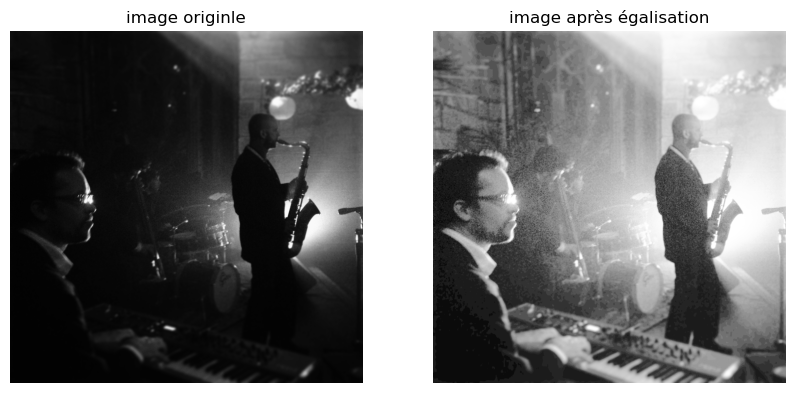

In [16]:
ims=skio.imread('images/sombre.jpg')
ims=ims.mean(axis=2) #on est sur que l'image est grise

(histo_s,bins)=np.histogram(ims.reshape((-1,)),np.arange(0,256)) #le reshape en inutile pour np.histogram, mais on le laisse pour la compatibilite avec plt.hist
histo_s=histo_s/histo_s.sum()
histocum_s=histo_s.cumsum()

imequal=255 * histocum_s[np.uint8(ims)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex = True, sharey = True)
ax1.imshow(ims, cmap=plt.get_cmap('gray'))
ax1.axis('off')
ax1.set_title('image originle')

ax2.imshow(imequal, cmap=plt.get_cmap('gray'))
ax2.axis('off')
ax2.set_title('image après égalisation')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

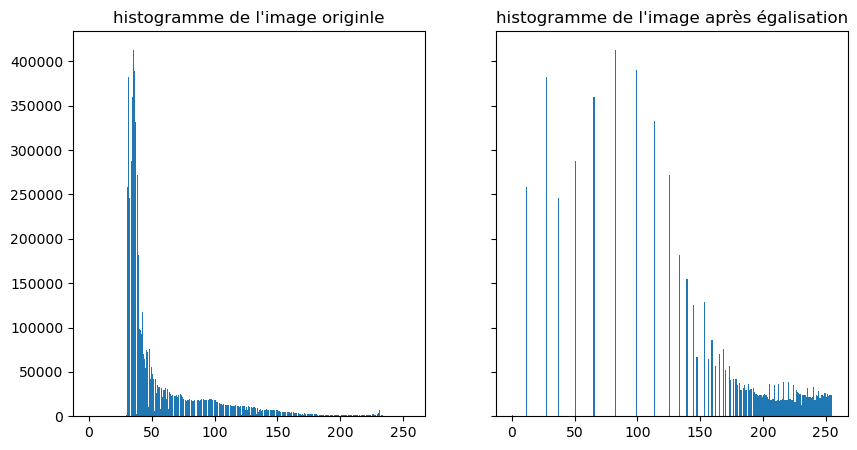

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex = True, sharey = True)
ax1.hist(ims.reshape((-1,)),bins=255)
ax1.set_title("histogramme de l'image originle")

ax2.hist(imequal.reshape((-1,)),bins=255)
ax2.set_title("histogramme de l'image après égalisation")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

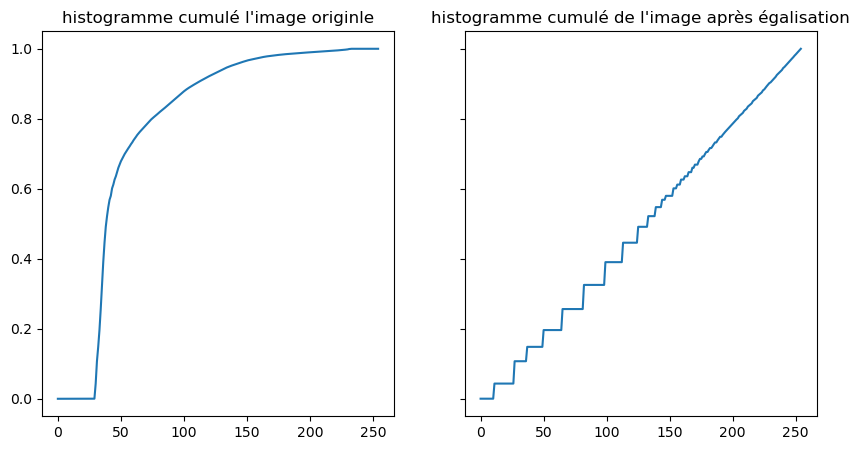

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex = True, sharey = True)
ax1.plot(histocum_s)
ax1.set_title("histogramme cumulé l'image originle")

(histo_n,bins)=np.histogram(imequal.reshape((-1,)),np.arange(0,256))
histo_n=histo_n/histo_n.sum()
histocum_n=histo_n.cumsum()
ax2.plot(histocum_n)
ax2.set_title("histogramme cumulé de l'image après égalisation")
plt.show

Qu'observez-vous sur imequal, sur son histogramme et sur son histogramme cumulé.
<br><br>
<i><b> Après avoir appliqué l'égalisation d'histogrammes à l'image, on peut observer que l'image résultante "imequal", présente une amélioration du contraste, ce qui rend les détails fins et les contours plus visibles, contribuant ainsi à une netteté accrue de l'image. L'histogramme de "imequal" est plus uniforme que celui de l'image d'origine, offrant une  répartition plus équilibrée des niveaux de gris. De plus, son histogramme cumulé présente une courbe plus linéaire que celui de l'image d'origine.</b></i>
<br>
<h2> &nbsp 3.4 Prescription d'histogramme </h2>



Les images "vue1.tif" et "vue2.tif" sont deux prises de vue d'une même scène avec la même ouverture et des temps d'expositions différents. Visualisez la valeur absolue de la différence des images,
qu'observe-t-on.

<function matplotlib.pyplot.show(close=None, block=None)>

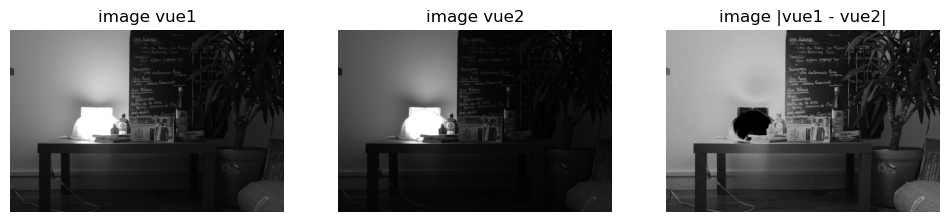

In [19]:
u =  skio.imread('images/vue1.tif')
v =  skio.imread('images/vue2.tif')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5), sharex = True, sharey = True)
ax1.imshow(u, cmap=plt.get_cmap('gray'))
ax1.axis('off')
ax1.set_title('image vue1')

ax2.imshow(v, cmap=plt.get_cmap('gray'))
ax2.axis('off')
ax2.set_title('image vue2')

ax3.imshow(abs(np.float32(u)-np.float32(v)), cmap=plt.get_cmap('gray'))
ax3.axis('off')
ax3.set_title('image |vue1 - vue2|')

plt.show

<i><b>Puisque l'image "vue1.tif" est plus lumineuse que l'image "vue2.tif" en raison d'un temps d'exposition plus long, les différences entre les deux images sont particulièrement remarquables. La valeur absolue de la différence entre ces images révèle ainsi les zones où des changements sont survenus en raison de variations de luminosité, de contraste et de détails.</b></i>
<br><br>
Même question après avoir donné à l'une des images l'histogramme de l'autre.

In [20]:
ushape=u.shape
uligne=u.reshape((-1,))
vligne=v.reshape((-1,))
ind=np.argsort(uligne)
unew=np.zeros(uligne.shape,uligne.dtype)
unew[ind]=np.sort(vligne)
unew=unew.reshape(ushape)

<function matplotlib.pyplot.show(close=None, block=None)>

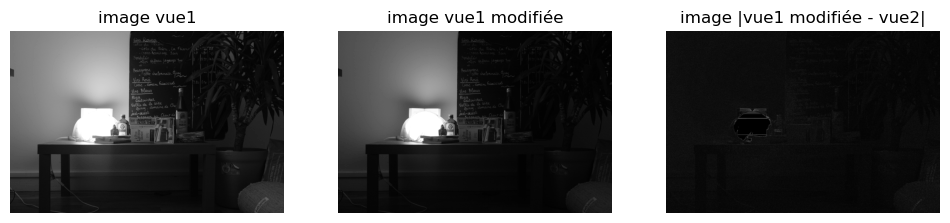

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5), sharex = True, sharey = True)
ax1.imshow(u, cmap=plt.get_cmap('gray'))
ax1.axis('off')
ax1.set_title('image vue1')

ax2.imshow(v, cmap=plt.get_cmap('gray'))
ax2.axis('off')
ax2.set_title('image vue1 modifiée')

ax3.imshow(abs(np.float32(unew)-np.float32(v)), cmap=plt.get_cmap('gray'))
ax3.axis('off')
ax3.set_title('image |vue1 modifiée - vue2|')

plt.show

<i><b>Lorsque l'histogramme de "vue2.tif" est appliqué à l'autre image, "vue1.tif", on observe que la valeur absolue de la différence entre les images résultantes est considérablement réduite par rapport à la différence entre les images originales.
En effet, en appliquant l'histogramme d'une image à une autre, on harmonise la distribution des niveaux de gris entre les deux images. Cela a pour effet de réduire les écarts de luminosité, de contraste et de détails entre les deux images, ce qui se traduit par une diminution significative de la valeur absolue de leur différence.</b></i>
<br><br>
Sachant que ces images ont été obtenues à partir d'images RAW (donc avec une réponse proportionnelle à la quantité de photon mesurée), a-t-on un moyen plus simple d'obtenir le même résultat ?

<function matplotlib.pyplot.show(close=None, block=None)>

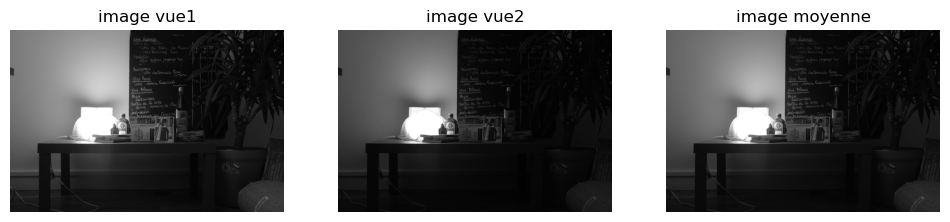

In [22]:
x = u/2 + v/2

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5), sharex = True, sharey = True)
ax1.imshow(u, cmap=plt.get_cmap('gray'))
ax1.axis('off')
ax1.set_title('image vue1')

ax2.imshow(v, cmap=plt.get_cmap('gray'))
ax2.axis('off')
ax2.set_title('image vue2')

ax3.imshow(x, cmap=plt.get_cmap('gray'))
ax3.axis('off')
ax3.set_title('image moyenne')

plt.show

<i><b>On pose $U$ (repectivement $V$) la valeur d'un pixel de l'image tiré uniformement de l'image "vue1.tif" (respectivement "vue2.tif").
Puisque ces images ont été obtenues à partir d'images RAW et que les deux sont deux prises de vue d'une même scène avec la même ouverture.
on peut approxiemer le lois de $U$ et $V$ telle que :
<br> $U \sim \mathcal{N}(gC_{\tau_{1}} + \mu_{R},\, g^2C_{\tau_{1}} +\sigma_{R}^{2})$ et $V \sim \mathcal{N}(gC_{\tau_{2}} + \mu_{R},\, g^2C_{\tau_{2}} +\sigma_{R}^{2})$
<br>avec :
<br>$\mu_{R}$ et $\sigma_{R}^{2}$ les moyennes et variances du bruit de lecture.
<br>$g$ : gain.
<br>$\tau$ : temps d’acquisition.
<br>$C$ radiance (photons / temps).
<br><br> Si on suppose de plus que $U$ et $V$ sont independetes alors la loi moyenne $X = \frac{U + V}{2} \sim \mathcal{N}(gC_{\tau_{moy}} + \mu_{R},\, g^2C_{\tau_{moy}} +\sigma_{R}^{2})$ avec $\tau_{moy} = \frac{\tau_{1} + \tau_{2}}{2}$.
<br>Donc, l'image résultante de la moyenne des deux images n'est pas distordue.</b></i>

En vous inspirant du code proposé pour la prescription d'histogramme, donnez un code simple
permettant d'égaliser l'histogramme d'une image (le rendre aussi proche que possible d'une fonction
constante).


<function matplotlib.pyplot.show(close=None, block=None)>

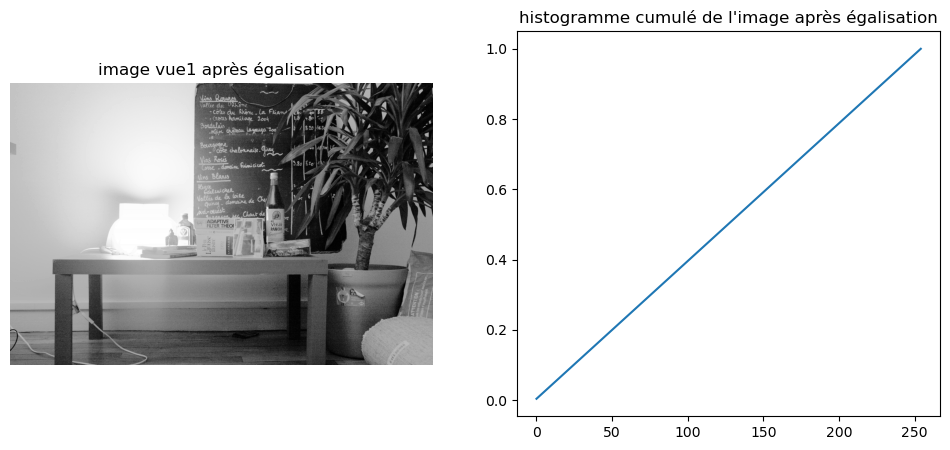

In [23]:
u =  skio.imread('images/vue1.tif')
ind=np.unravel_index(np.argsort(u, axis=None), u.shape)
u_new=np.zeros(u.shape,u.dtype)
u_new[ind]=np.arange(0,255,255/(u.shape[0]*u.shape[1]))

fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(12,5))
ax1.imshow(u_new, cmap=plt.get_cmap('gray'))
ax1.axis('off')
ax1.set_title('image vue1 après égalisation')

(histo,bins)=np.histogram(u_new.reshape((-1,)),np.arange(0,256))
histo=histo/histo.sum()
histocum=histo.cumsum()
ax2.plot(histocum)
ax2.set_title("histogramme cumulé de l'image après égalisation")
plt.show

<h2> &nbsp 3.5 Dithering </h2>
<br>
Observez l'effet d'une quantification de plus en plus brutale sur une image.

Text(0.5, 1.0, 'image quantifiée a 2 niveaux')

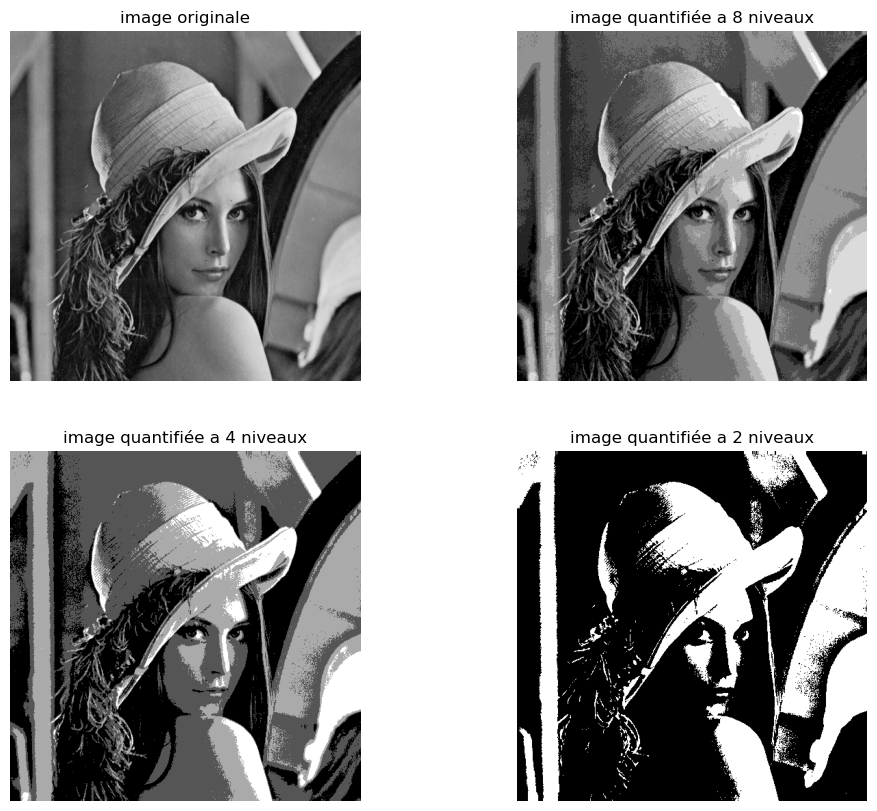

In [24]:
im = skio.imread('images/lena.tif')
im2 = quantize(im, 2)
im4 = quantize(im, 4)
im8 = quantize(im, 8)

fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2, 2, figsize=(12,10))
ax1.imshow(im, cmap=plt.get_cmap('gray'))
ax1.axis('off')
ax1.set_title('image originale')

ax2.imshow(im8, cmap=plt.get_cmap('gray'))
ax2.axis('off')
ax2.set_title('image quantifiée a 8 niveaux')

ax3.imshow(im4, cmap=plt.get_cmap('gray'))
ax3.axis('off')
ax3.set_title('image quantifiée a 4 niveaux')

ax4.imshow(im2, cmap=plt.get_cmap('gray'))
ax4.axis('off')
ax4.set_title('image quantifiée a 2 niveaux')

Pour comprendre la méthode du dithering, commencez par seuiller une image (avec seuil ) et visualisez le résultat. Appliquez le même seuillage à une version bruitée de l'image originale et visualisez.

<function matplotlib.pyplot.show(close=None, block=None)>

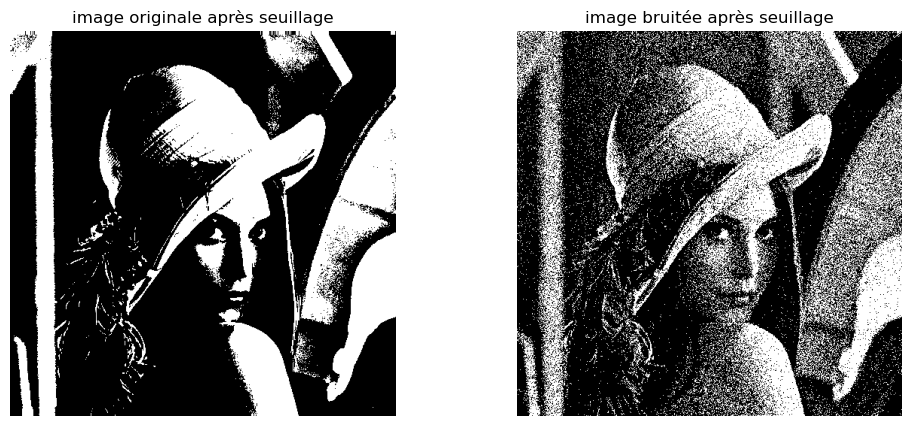

In [25]:
u_seuil = seuil(im,128)
u_dith = seuil(noise(im,40),128)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.imshow(u_seuil, cmap=plt.get_cmap('gray'))
ax1.axis('off')
ax1.set_title('image originale après seuillage')

ax2.imshow(u_dith, cmap=plt.get_cmap('gray'))
ax2.axis('off')
ax2.set_title('image bruitée après seuillage')

plt.show

Que constatez vous? En considérant un pixel de niveau x dans l'image initiale, donnez la probabilité pour que ce pixel
soit blanc après ajout de bruit et seuillage. Pourquoi l'image détramée ressemble-t-elle plus à l'image
de départ que l'image simplement seuillée?
<br><br>
<i><b>
    On constate que lorsque on seuille une image sans ajouter de bruit, on crée une image binaire où les pixels sont soit blancs (valeur supérieure au seuil) soit noirs (valeur inférieure au seuil). Cette opération peut entraîner une perte de détails subtils dans l'image, en particulier dans les zones où les niveaux de gris sont proches du seuil.
<br>
Par contre lorsque on ajoute du bruit à l'image avant de la seuiller, on introduit une variation aléatoire dans les niveaux de gris des pixels. Cette variation aléatoire signifie que certains pixels qui seraient normalement noirs sans le bruit deviennent blancs et vice versa. Le bruit "mélange" les niveaux de gris, créant ainsi une illusion de niveaux de gris intermédiaires dans l'image résultante. Cela peut améliorer la qualité visuelle en évitant les contours brusques et en préservant davantage de détails.
    <br><br>Soit $X$ la variable aléatoire modélisant la valeur prix par un pixel tiré uniformément. on applique un bruit additif Gaussien a l'image. Donc on note $Z \sim \mathcal{N}(0,\,\sigma^{2})$ la variable aléatoire modélaisant le bruit et $Y = X + Z$ le pixel bruité. soit $a$ la valeur du seuil. donc la probabilité q'un pixel de valeur $x$ soit blanc après ajout de bruit et seuillage est :
    <br>$ P(Y 	\ge a\, / X = x) = P(Z \ge a - x\, / X = x) = \int_{a-x}^{+\infty} \mathrm {\frac{1}{\sqrt{2\pi}\sigma}{e}^{-\frac{x^2}{2\sigma^2}}}\,\mathrm{d}x$ qui est une fonction continue croissante en $x$ .
</b></i>
<br>
<h2> &nbsp 3.6 Différences de niveaux de gris voisins </h2> 
<br>
On veut maintenant étudier la statistique de la différence de niveau de gris entre deux pixels adjacents. Gràce à la commande gradx on peut obtenir une image de la différence entre pixels adjacents.
Visualisez l'histogramme d'une telle image. Visualisez le logarithme de l'histogramme.

C:\Users\DELL\AppData\Local\Temp\ipykernel_21408\1260521259.py:12: RuntimeWarning: divide by zero encountered in log
  ax3.plot(np.log(np.histogram(gradx_im,255)[0]))


<function matplotlib.pyplot.show(close=None, block=None)>

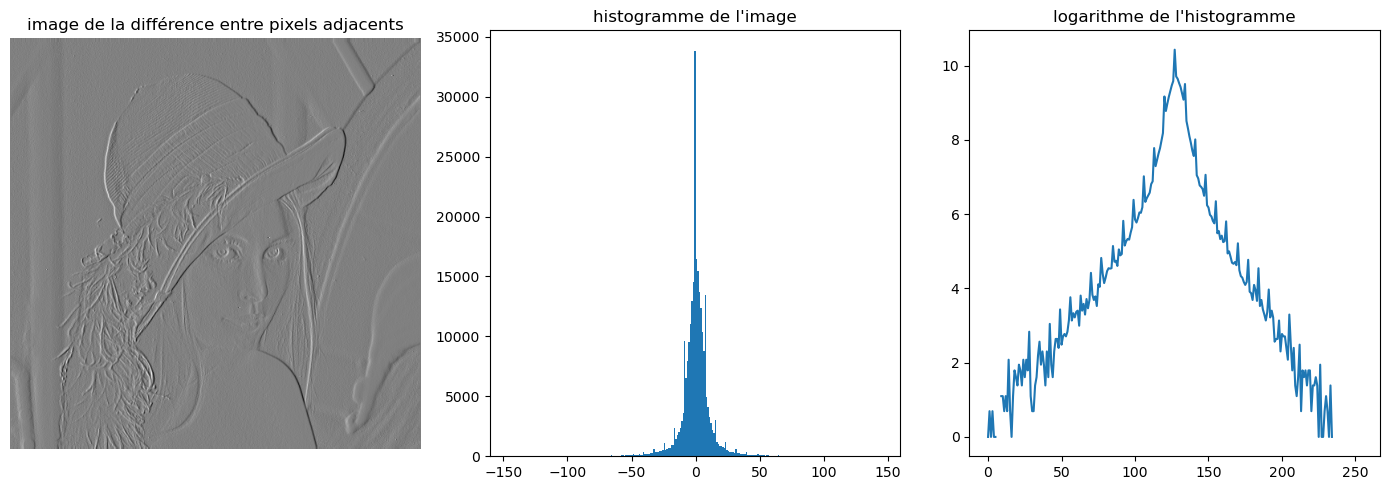

In [26]:
gradx_im = gradx(im)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,5))

ax1.imshow(gradx_im, cmap=plt.get_cmap('gray'))
ax1.axis('off')
ax1.set_title('image de la différence entre pixels adjacents')

ax2.hist(gradx_im.reshape((-1,)),bins=255)
ax2.set_title("histogramme de l'image")

ax3.plot(np.log(np.histogram(gradx_im,255)[0]))
ax3.set_title("logarithme de l'histogramme")
fig.tight_layout()
plt.show

La distribution des différences vous semble-t-elle obéir a une loi gaussienne ? Pourquoi ? Quelle
aurait été la forme de l'histogramme si l'on avait considéré la différences entre pixels plus éloignés?
<br>
<i><b>
Dans de nombreuses régions d'une image, les variations locales de niveau de gris sont le résultat de nombreux facteurs aléatoires (par exemple, le bruit) et déterministes (par exemple, les variations de texture). Lorsque vous considérez les différences entre pixels adjacents, on agrége ces variations locales en une seule différence de niveau de gris, ce qui peut conduire à une distribution qui approxime une loi gaussienne en vertu du Théorème central limite.
    <br>En effet le Théorème central limite stipule que la somme ou la moyenne d'un grand nombre d'observations indépendantes et identiquement distribuées (iid) suit approximativement une distribution normale (gaussienne), quelle que soit la distribution initiale des observations. Dans le contexte de la différence de niveau de gris entre pixels adjacents, on suppose souvent que ces différences sont iid, ce qui justifie l'utilisation d'une distribution gaussienne pour les modéliser.
    <br>De plus la gaussinne est centrée puisque la plupart d'entre eux présentent une différence de niveau de gris moyenne de 0, avec un écart type correspondant au niveau de variation du contour.
<br>Si l'on avait considéré la différence de niveau de gris entre des pixels plus éloignés au lieu de pixels adjacents, l'histogramme aurait probablement montré une distribution plus lisse et moins sujette aux variations locales et aux détails fins.
</b></i>
<br>
<h1> 4 Spectre des images et transformation de Fourier</h1>
<h2> &nbsp 4.1 Visualisation de spectres </h2>
<br>
Gràce à la fonction view_spectre on peut visualiser le spectre d'une image. Visualisez les spectres
de différentes images en utilisant les options 1 et 2.

In [27]:
imf=skio.imread('images/facade.tif')
view_spectre(imf,option=1)
view_spectre(imf, option=2)
iml=skio.imread('images/lena.tif')
view_spectre(iml,option=1)
view_spectre(iml, option=2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21408\3591783442.py:38: UserWarning: C:\Users\DELL\AppData\Local\Temp\tmpltiisowvTPIMA.png is a low contrast image
  skio.imsave(nomfichier,imt)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21408\3591783442.py:38: UserWarning: C:\Users\DELL\AppData\Local\Temp\tmpcgph8wa1TPIMA.png is a low contrast image
  skio.imsave(nomfichier,imt)


<br>
<div style = "display: inline-block">
    <img src = "captures/facade.png", width="270">
    <h3 style="text-align:center">Image facade.tif </h3>
</div>
<div style = "display: inline-block">
    <img src = "./captures/spectre1 facade.png" width="270">
    <h3 style="text-align:center">Spectre de l'image avec l'option 1 </h3>
</div>
<div style = "display: inline-block">
    <img src = "./captures/spectre2 facade .png" width="270">
    <h3 style="text-align:center">Spectre de l'image avec l'option 2 </h3>
</div>
<div><br></div>
<div style = "display: inline-block">
    <img src = "./captures/lena.png", width="270">
    <h3 style="text-align:center">Image lena.tif </h3>
</div>
<div style = "display: inline-block">
    <img src = "./captures/spectre1 lena.png" width="270">
    <h3 style="text-align:center">Spectre de l'image avec l'option 1 </h3>
</div>
<div style = "display: inline-block">
    <img src = "./captures/spectre2 lena.png" width="270">
    <h3 style="text-align:center">Spectre de l'image avec l'option 2 </h3>
</div>
<br><br>
Que constatez-vous? Qu'en déduisez-vous par rapport au spectre d'une image?
<br><br><i><b> On observe que le spectre, avec l'option 1, apparaît comme un point. Ceci s'explique par la grande différence de valeurs entre la position centrale et les autres positions. Par conséquent, en appliquant le logarithme (option 2), on peut mieux observer le spectre. L'image 'facade.tif' présente principalement des traits verticaux et horizontaux, ce qui se traduit par deux traits un vertical et l'autre horizontal centrés dans le spectre. En revanche, l'image 'lena.tif' ne présente pas autant de traits verticaux et horizontaux, ce qui fait que les deux traits dans le spectre sont plus faibles mais toujours perceptibles, en partie à cause des effets de bord. De plus, l'image présente plusieurs détails qui se manifestent par des zones distinctes dans le spectre. </b></i>
<br><br>
Comment influe l'option hamming sur le spectre de l'image? Visualisez le spectre de l'image synthétique rayures.tif. Que constatez-vous? Peut-on retrouver les caractéristiques des rayures de l'image à partir de son spectre? Expliquez la différence entre la visualisation avec et sans l'option hamming?

In [28]:
im=skio.imread('images/rayures.tif')
view_spectre(im,option = 2, hamming = False)
view_spectre(im,option = 2, hamming = True)

<br>
<div style = "display: inline-block">
    <img src = "captures/rayures.png">
    <h3 style="text-align:center">Image rayures.tif <br> </h3>
</div>
<div style = "display: inline-block">
    <img src = "./captures/rayures sh.png">
    <h3 style="text-align:center">Spectre de l'image <br> &nbsp &nbsp sans fenêtre de Hamming</h3>
</div>
<div style = "display: inline-block">
    <img src = "./captures/rayures ah.png">
    <h3 style="text-align:center">Spectre de l'image <br> &nbsp &nbsp avec fenêtre de Hamming </h3>
</div>
<br><br>
<i><b>Lorsque on applique la fenêtre de Hamming à l'image avant de calculer sa transformée de Fourier, on reduit les valeurs près des bords de l'image. En conséquence, cela peut réduire les effets de leakage spectral, produire un spectre plus propre et plus concentré, et améliorer la visualisation des fréquences présentes dans l'image. 
    <br>Donc lorsque on applique la fenêtre de Hamming à l'image 'rayures.tif' avant de calculer sa transformée de Fourier, on peut obtenir un spectre plus net et concentré, avec des pics qui correspondent mieux aux caractéristiques des rayures de l'image. Les rayures devraient être plus faciles à discerner dans le spectre.

Par contre si on calcule directement la transformée de Fourier sans appliquer la fenêtre de Hamming, on observe plus d'effets de leakage spectral, ce qui peut rendre le spectre moins précis pour représenter les caractéristiques des rayures de l'image. Les fréquences des rayures sont moins distinctes dans le spectre.  </b></i>
<br>
Quel effet a le sous-échantillonnage sur le spectre (on peut utiliser une image synthétique et une image naturelle (Par exemple carte_nb.tif))

In [29]:
im=skio.imread('images/carte_nb.tif')
view_spectre(im,option = 2, hamming = True)

<br>
<div style = "display: inline-block">
    <img src = "captures/carte_nb.png">
    <h3 style="text-align:center">Image carte_nb.tif </h3>
</div>
<div style = "display: inline-block"></div>
<div style = "display: inline-block">
    <img src = "./captures/spectre carte_nb.png">
    <h3 style="text-align:center">Spectre de l'image</h3>
</div>
<br><br>
<i><b>Le sous-échantillonnage peut provoquer un phénomène d'aliasing (des fréquences élevées de l'image d'origine sont repliées sur des fréquences plus basses lors de la transformation de Fourier). Cela signifie que des détails fins de l'image d'origine peuvent être incorrectement représentés dans le spectre sous forme de fréquences plus basses ce qui entraîne une perte d'informations et des artefacts indésirables dans le spectre comme on peut le voir dans l'image carte_nb.tif.</b></i>
<h2> &nbsp 4.2 Ringing </h2>
<br>
A l'aide de la fonction "filterlow" , appliquez un filtre passe bas parfait à une image. Visualisez l'image
résultante, ainsi que son spectre. Que constatez-vous?
Mêmes questions en utilisant la commande filtergauss

In [30]:
im=skio.imread('images/amiens1.tif')
im_fpb = filterlow(im)
im_fg = filtergauss(im)
viewimage(im)
viewimage(im_fpb)
viewimage(im_fg)
view_spectre(im,option = 2, hamming = True)
view_spectre(im_fpb,option = 2, hamming = True)
view_spectre(im_fg,option = 2, hamming = True)

<br>
<div style = "display: inline-block">
    <img src = "captures/amiens1.png", width="300">
</div>
<div style = "display: inline-block"></div>
<div style = "display: inline-block">
    <img src = "./captures/im_pb.png", width="300" >
</div>
<div style = "display: inline-block"></div>
<div style = "display: inline-block">
    <img src = "./captures/im_g.png", width="300">
</div>
<div></div>
<div style = "display: inline-block">
    <img src = "./captures/spectre orig.png", width="300">
    <h3 style="text-align:center">Image originale</h3>
</div>
<div style = "display: inline-block"></div>
<div style = "display: inline-block">
    <img src = "./captures/spectre fpb.png", width="300" >
    <h3 style="text-align:center">Filtre passe bas</h3>
</div>
<div style = "display: inline-block"></div>
<div style = "display: inline-block">
    <img src = "./captures/spectre fg.png", width="300">
    <h3 style="text-align:center">Filtre gaussien</h3>
</div>
<br>
<br>
Visualisez les deux masques (sous le répertoire images) "masque_bas_centre.tif" (pour le filtrage passe-bas parfait) et "masque_gauss_centre.tif" (pour le filtrage gaussien). Quelle différence
constatez-vous, en particulier quelle conséquence a la discontinuité de la transformée de Fourier sur la
vitesse de décroissance du filtre spatial correspondant?
<br><br>
<div style = "display: inline-block">
    <img src = "captures/masque_bas_centre.png">
    <h3 style="text-align:center">Filtrage passe-bas parfait</h3>
</div>
<div style = "display: inline-block"></div>
<div style = "display: inline-block">
    <img src = "captures/masque_gauss_centre.png">
    <h3 style="text-align:center">Filtrage gaussien</h3>
</div>
<br><br>
<i><b> Lorsque on applique un filtre passe-bas parfait (idéal) à une image, il conserve les basses fréquences (les variations lentes) de l'image tout en atténuant fortement les hautes fréquences (les variations rapides).
En conséquence, l'image résultante sera floue, car les détails fins seront supprimés. Les contours nets deviendront plus lisses.
Le spectre de l'image aura une distribution concentrée autour du centre, avec une forte atténuation des hautes fréquences.
<br>
Lorsque on applique un filtre gaussien à une image, il agit également comme un filtre passe-bas, mais avec une transition plus douce entre les fréquences hautes et basses.
L'image résultante sera floue, mais le flou sera plus doux que celui provoqué par un filtre passe-bas parfait. Les détails seront également réduits, mais de manière moins drastique.
Le spectre de l'image montrera également une atténuation des hautes fréquences, mais la transition sera plus douce, ce qui signifie que certaines hautes fréquences seront préservées par rapport au filtre passe-bas parfait.</b></i>